# Projet 8 : Réalisez un dashboard et assurez une veille technique

## 1. Installation des bibliothèques

In [2]:

!pip install transformers datasets torch torchvision matplotlib


   ---------------------------------------- 0.0/172.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/172.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/172.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/172.3 MB 1.4 MB/s eta 0:02:03
   ---------------------------------------- 1.0/172.3 MB 1.5 MB/s eta 0:01:53
   ---------------------------------------- 1.3/172.3 MB 1.5 MB/s eta 0:01:53
   ---------------------------------------- 1.8/172.3 MB 1.5 MB/s eta 0:01:51
   ---------------------------------------- 2.1/172.3 MB 1.6 MB/s eta 0:01:49
    --------------------------------------- 2.4/172.3 MB 1.6 MB/s eta 0:01:49
    --------------------------------------- 2.6/172.3 MB 1.6 MB/s eta 0:01:49
    --------------------------------------- 3.1/172.3 MB 1.6 MB/s eta 0:01:47
    --------------------------------------- 3.4/172.3 MB 1.6 MB/s eta 0:01:46
    --------------------------------------- 3.9/172.3 MB 1.6 MB/s eta 0:01:44
    ---

# 2. Préparation des données


### 2.1 Chargement des données

In [2]:
import pandas as pd
from datasets import Dataset

In [3]:
# Charger votre CSV
data = pd.read_csv('data.csv')

In [4]:
data

,uniq_id,product_name,image,description,brand,category_lvl_1,category_lvl_2,category_lvl_3,main_category,cleaned_text
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance,Home Furnishing,Curtains & Accessories,Curtains,Home Furnishing,eleg polyest multicolor abstract eyelet door c...
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,Baby Care,Baby Bath & Skin,Baby Bath Towels,Baby Care,sathiya cotton bath towelspecif sathiya cotton...
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,Baby Care,Baby Bath & Skin,Baby Bath Towels,Baby Care,eurospa cotton terri face towel setkey featur ...
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,Home Furnishing,Bed Linen,Bedsheets,Home Furnishing,santosh royal fashion cotton print king size d...
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,Home Furnishing,Bed Linen,Bedsheets,Home Furnishing,jaipur print cotton floral king size doubl bed...
...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower,Baby Care,Baby & Kids Gifts,Stickers,Baby Care,oren empow extra larg self adhes stickeroren e...
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra,Baby Care,Baby & Kids Gifts,Stickers,Baby Care,wallmantra larg vinyl sticker stickerwallmantr...
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe,Baby Care,Baby & Kids Gifts,Stickers,Baby Care,uberlyf extra larg pigment polyvinyl film impo...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra,Baby Care,Baby & Kids Gifts,Stickers,Baby Care,wallmantra medium vinyl sticker stickerbuy wal...


In [8]:
print(data.columns)


Index(['uniq_id', 'product_name', 'image', 'description', 'brand',
       'category_lvl_1', 'category_lvl_2', 'category_lvl_3', 'main_category',
       'cleaned_text'],
      dtype='object')


### 2.2 : Extraction des caractéristiques des images avec ViT

In [10]:
from transformers import ViTFeatureExtractor, ViTModel
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

C:\Users\SOUKA\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\SOUKA\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
C:\Users\SOUKA\anaconda3\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issu

In [92]:
# Initialiser le modèle ViT et le feature extractor
model_name = "google/vit-base-patch16-224-in21k"
model = ViTModel.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Initialisation de la liste des caractéristiques
images_features = []
i = 0

C:\Users\SOUKA\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [94]:
# Dossier des images
image_dir = r'C:\Users\SOUKA\Documents\Images'

for image_file in data["image"]:
    if i % 100 == 0: 
        print(f"Processing image {i}/{len(data)}")
    i += 1

    # Charger et préparer l'image
    image_path = os.path.join(image_dir, image_file)
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.astype(np.float32) / 255.0  # Normalisation
    image = np.expand_dims(image, axis=0)
    
    # Prétraiter l'image avec ViTFeatureExtractor
    inputs = feature_extractor(images=image, return_tensors="pt")
    
    # Extraire les caractéristiques à partir du modèle ViT
    outputs = model(**inputs)
    images_features.append(outputs.last_hidden_state.mean(dim=1).detach().numpy())

# Convertir en numpy array
images_features = np.vstack(images_features)
print(images_features.shape)

Processing image 0/1050
Processing image 100/1050
Processing image 200/1050
Processing image 300/1050
Processing image 400/1050
Processing image 500/1050
Processing image 600/1050


C:\Users\SOUKA\anaconda3\Lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Processing image 700/1050
Processing image 800/1050
Processing image 900/1050
Processing image 1000/1050
(1050, 768)


### 2.3 : Réduction de dimension avec PCA

In [97]:
from sklearn.decomposition import PCA

In [99]:

# Appliquer PCA
print(images_features.shape)
pca = PCA(n_components=0.99)
feat_pca = pca.fit_transform(images_features)
print(feat_pca.shape)


(1050, 768)
(1050, 77)


### 2.3 bis : Réduction de dimension avec T-SNE

In [102]:
from sklearn.manifold import TSNE
import time

In [104]:

# Appliquer T-SNE
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)
print(f"Temps T-SNE : {time.time() - start_time:.2f} secondes")


C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Temps T-SNE : 6.79 secondes


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

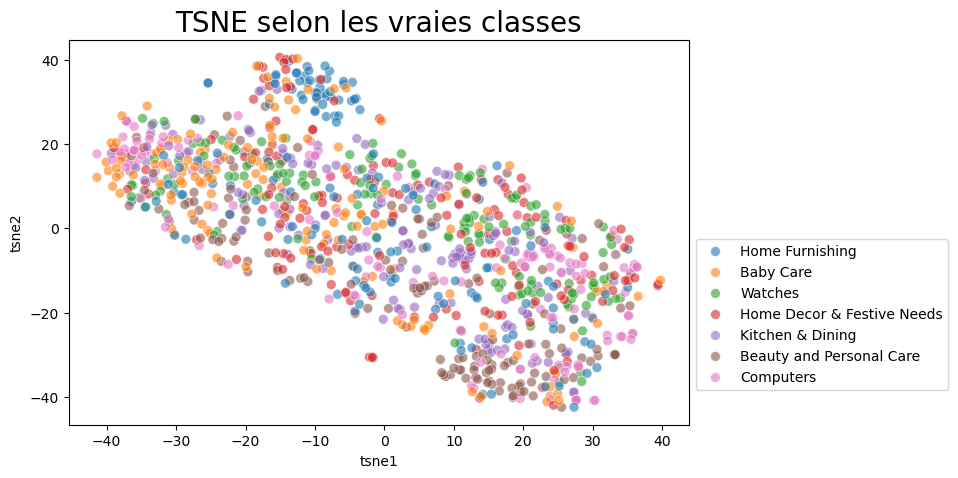

In [106]:
# Visualisation des Classes Réelles avec t-SNE

# Ajouter les résultats t-SNE dans un DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["main_category"]  # Classes réelles

# Visualisation des classes réelles
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="tsne1", 
    y="tsne2", 
    hue="class", 
    palette=sns.color_palette('tab10', n_colors=len(data["main_category"].unique())), 
    s=50, alpha=0.6, data=df_tsne, legend="brief"
)
plt.title('TSNE selon les vraies classes', fontsize=20)
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()


### 2.4 : Clustering avec KMeans et calcul de l'ARI

In [108]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [109]:

# Appliquer KMeans
kmeans = KMeans(n_clusters=len(data["main_category"].unique()), n_init=100, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Calculer l'ARI
labels = data["main_category"]
ari_score = adjusted_rand_score(labels, clusters)
print(f"ARI : {ari_score}")


ARI : 0.05434030321059341


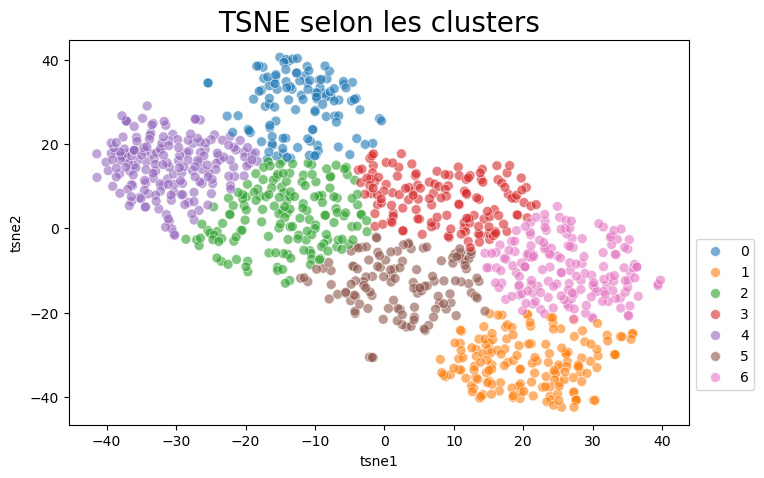

In [110]:
# Ajouter les clusters au DataFrame
df_tsne["cluster"] = clusters

# Visualisation selon les clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="tsne1", 
    y="tsne2", 
    hue="cluster", 
    palette=sns.color_palette('tab10', n_colors=len(data["main_category"].unique())), 
    s=50, alpha=0.6, data=df_tsne, legend="brief"
)
plt.title('TSNE selon les clusters', fontsize=20)
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

### 2.5 : Matrice de confusion et analyse

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [113]:
# Encoder les labels réels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(data["main_category"])

In [114]:
# Calcul de la matrice de confusion initiale
conf_mat = confusion_matrix(labels_encoded, clusters)
print("Matrice de confusion initiale :\n", conf_mat)

Matrice de confusion initiale :
 [[19 15 29 11 53 14  9]
 [ 4 59 26  9 19 22 11]
 [ 6 32 10  8 39 12 43]
 [21 10 30 31  9 17 32]
 [48 16 17 16 16 24 13]
 [13 22 23 20 22 35 15]
 [ 4  7 23 43 28  1 44]]


In [115]:
# Correspondance des clusters avec les vraies classes
corresp = np.argmax(conf_mat, axis=0)

In [116]:
# Transformation des clusters
clusters_transformed = np.array([corresp[c] for c in clusters])

In [117]:
# Nouvelle matrice de confusion après transformation
conf_mat_transformed = confusion_matrix(labels_encoded, clusters_transformed)
print("Matrice de confusion après transformation :\n", conf_mat_transformed)

Matrice de confusion après transformation :
 [[53 15  0 29 19 14 20]
 [19 59  0 26  4 22 20]
 [39 32  0 10  6 12 51]
 [ 9 10  0 30 21 17 63]
 [16 16  0 17 48 24 29]
 [22 22  0 23 13 35 35]
 [28  7  0 23  4  1 87]]


In [118]:
# Rapport de classification
report = classification_report(labels_encoded, clusters_transformed, target_names=label_encoder.classes_)
print("Rapport de classification :\n", report)

Rapport de classification :
                             precision    recall  f1-score   support

                 Baby Care       0.28      0.35      0.32       150
  Beauty and Personal Care       0.37      0.39      0.38       150
                 Computers       0.00      0.00      0.00       150
Home Decor & Festive Needs       0.19      0.20      0.19       150
           Home Furnishing       0.42      0.32      0.36       150
          Kitchen & Dining       0.28      0.23      0.25       150
                   Watches       0.29      0.58      0.38       150

                  accuracy                           0.30      1050
                 macro avg       0.26      0.30      0.27      1050
              weighted avg       0.26      0.30      0.27      1050



C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOUKA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


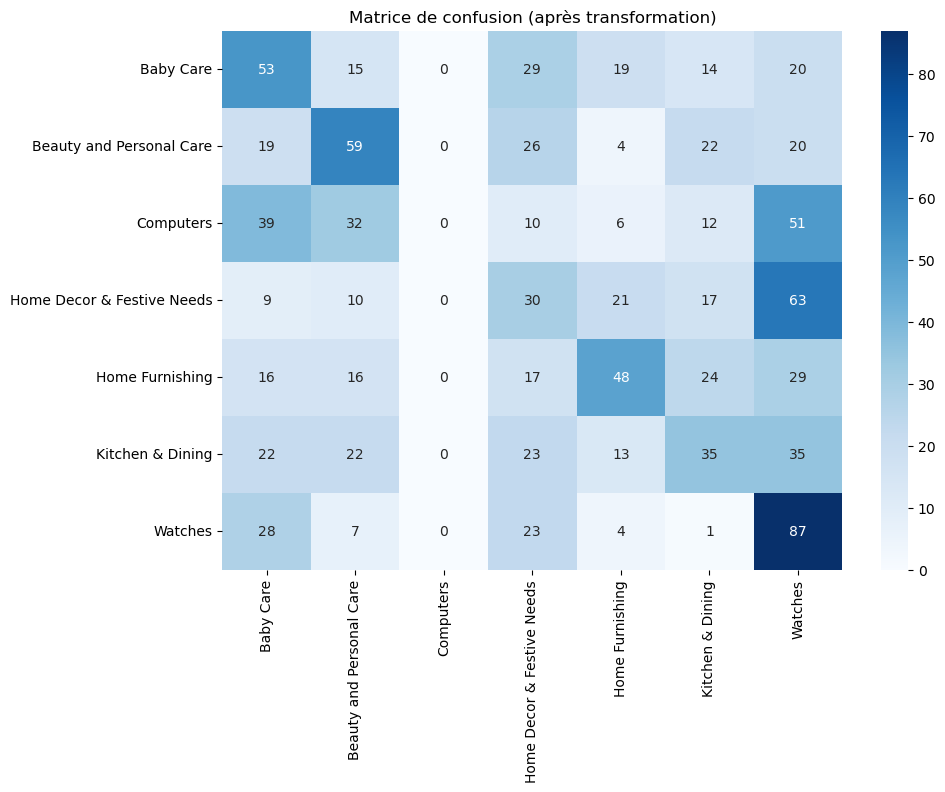

In [119]:
# Affichage de la matrice de confusion avec seaborn
df_cm = pd.DataFrame(conf_mat_transformed, index=label_encoder.classes_, columns=label_encoder.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues")
plt.title("Matrice de confusion (après transformation)")
plt.show()

### 2.6 : Recalculer la matrice de confusion
Assurez-vous de calculer la matrice de confusion directement entre les clusters prédits et les catégories réelles encodées :

In [125]:
# Calculer la matrice de confusion avec les clusters bruts
conf_mat = confusion_matrix(labels_encoded, clusters)

print("Matrice de confusion avec clusters bruts :\n", conf_mat)


Matrice de confusion avec clusters bruts :
 [[19 15 29 11 53 14  9]
 [ 4 59 26  9 19 22 11]
 [ 6 32 10  8 39 12 43]
 [21 10 30 31  9 17 32]
 [48 16 17 16 16 24 13]
 [13 22 23 20 22 35 15]
 [ 4  7 23 43 28  1 44]]


### 2.7 Transformer les clusters pour aligner avec les vraies catégories

In [138]:

# Correspondance des clusters avec les vraies catégories
corresp = np.argmax(conf_mat, axis=0)

# Transformer les clusters
clusters_transformed = np.array([corresp[c] for c in clusters])

# Recalculer la matrice de confusion transformée
conf_mat_transformed = confusion_matrix(labels_encoded, clusters_transformed)

print("Matrice de confusion transformée :\n", conf_mat_transformed)


Matrice de confusion transformée :
 [[53 15  0 29 19 14 20]
 [19 59  0 26  4 22 20]
 [39 32  0 10  6 12 51]
 [ 9 10  0 30 21 17 63]
 [16 16  0 17 48 24 29]
 [22 22  0 23 13 35 35]
 [28  7  0 23  4  1 87]]


### 2.8 Affichage de la Matrice avec les Clusters

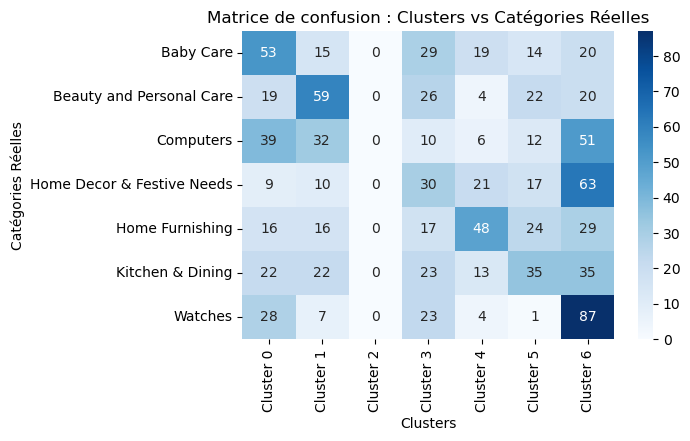

In [141]:
# Conversion en DataFrame pour affichage
df_cm = pd.DataFrame(conf_mat_transformed, 
                     index=label_encoder.classes_,  # Catégories réelles
                     columns=[f"Cluster {i}" for i in range(conf_mat_transformed.shape[1])])  # Clusters

# Visualisation
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Clusters")
plt.ylabel("Catégories Réelles")
plt.title("Matrice de confusion : Clusters vs Catégories Réelles")
plt.show()
